In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import simulation
from topology import nodes_admix,nodes_simple,events_admix,events_simple
from likelihood import create_nodes_map,mig_matrix, expected_ratio_tensor,frac_function_pm,expected_ratio,expected_ratio_tensor_new
import pytensor.tensor as pt


In [5]:

N = pt.as_tensor_variable([2500,2500,2500,1000,5000])
T_ = pt.as_tensor_variable([0,25,50,10000000])
## The length bins we are interested.
L = [0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.5,2,2.5,3,3.5,4,4.5,5,100] 
out_shape = (len(L) - 1, 3, 3)  # Adjust this shape according to your needs
out_tensor = pt.zeros(out_shape)

 

for i in range(len(L)-1):
    u = L[i]
    v = L[i+1]
    true_mean = expected_ratio_tensor(N=N,starting = 5,d=3,T=T_,nodes=nodes_simple, events=events_simple,u=u,v=v)
    out_tensor = pt.set_subtensor(out_tensor[i], true_mean)


In [6]:
out_tensor.eval()

array([[[8.18238665e-01, 8.34736306e-01, 8.34736306e-01],
        [8.34736306e-01, 8.06097348e-01, 8.14194687e-01],
        [8.34736306e-01, 8.14194687e-01, 8.06097348e-01]],

       [[7.98253613e-02, 8.13484328e-02, 8.13484328e-02],
        [8.13484328e-02, 7.87505636e-02, 7.95301963e-02],
        [8.13484328e-02, 7.95301963e-02, 7.87505636e-02]],

       [[1.73836430e-02, 1.76711114e-02, 1.76711114e-02],
        [1.76711114e-02, 1.72053990e-02, 1.73696785e-02],
        [1.76711114e-02, 1.73696785e-02, 1.72053990e-02]],

       [[1.18860294e-02, 1.20510996e-02, 1.20510996e-02],
        [1.20510996e-02, 1.18037040e-02, 1.19119702e-02],
        [1.20510996e-02, 1.19119702e-02, 1.18037040e-02]],

       [[8.64711847e-03, 8.73631815e-03, 8.73631815e-03],
        [8.73631815e-03, 8.62586692e-03, 8.70053634e-03],
        [8.73631815e-03, 8.70053634e-03, 8.62586692e-03]],

       [[6.57941358e-03, 6.61724778e-03, 6.61724778e-03],
        [6.61724778e-03, 6.60065768e-03, 6.65337871e-03],
    

In [2]:
N = pt.as_tensor_variable([2500,2500,2500,1000,5000])
T_ = pt.as_tensor_variable([0,25,50,10000000])
## The length bins we are interested.
L = [0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.5,2,2.5,3,3.5,4,4.5,5,100] 
out_shape = (len(L) - 1, 3, 3)  # Adjust this shape according to your needs
out_tensor_new = pt.zeros(out_shape)

 

for i in range(len(L)-1):
    u = L[i]
    v = L[i+1]
    true_mean = expected_ratio_tensor_new(N=N,starting=5,d=3,T=T_,nodes=nodes_simple, events=events_simple,u=u,v=v)
    out_tensor_new = pt.set_subtensor(out_tensor_new[i], true_mean)

In [3]:
out_tensor_new.eval()

array([[[8.18238665e-01, 8.34736306e-01, 8.34736306e-01],
        [8.34736306e-01, 8.06097348e-01, 8.14194687e-01],
        [8.34736306e-01, 8.14194687e-01, 8.06097348e-01]],

       [[7.98253613e-02, 8.13484328e-02, 8.13484328e-02],
        [8.13484328e-02, 7.87505636e-02, 7.95301963e-02],
        [8.13484328e-02, 7.95301963e-02, 7.87505636e-02]],

       [[1.73836430e-02, 1.76711114e-02, 1.76711114e-02],
        [1.76711114e-02, 1.72053990e-02, 1.73696785e-02],
        [1.76711114e-02, 1.73696785e-02, 1.72053990e-02]],

       [[1.18860294e-02, 1.20510996e-02, 1.20510996e-02],
        [1.20510996e-02, 1.18037040e-02, 1.19119702e-02],
        [1.20510996e-02, 1.19119702e-02, 1.18037040e-02]],

       [[8.64711847e-03, 8.73631815e-03, 8.73631815e-03],
        [8.73631815e-03, 8.62586692e-03, 8.70053634e-03],
        [8.73631815e-03, 8.70053634e-03, 8.62586692e-03]],

       [[6.57941358e-03, 6.61724778e-03, 6.61724778e-03],
        [6.61724778e-03, 6.60065768e-03, 6.65337871e-03],
    

In [4]:
N = [1250,1250,1250,500,2500]
T = [25,50]
## The length bins we are interested.
L = [0,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.5,2,2.5,3,3.5,4,4.5,5,100] 
T_ = [0]+T
real_N = [i*2 for i in N]
out = []


for i in range(len(L)-1):
    u = L[i]
    v = L[i+1]
    true_mean = expected_ratio(N=real_N,d=3,T=T_,nodes=nodes_simple, events=events_simple,u=u,v=v)
    out.append(true_mean)
out

[array([[0.81823867, 0.83473631, 0.83473631],
        [0.83473631, 0.80609735, 0.81419469],
        [0.83473631, 0.81419469, 0.80609735]]),
 array([[0.07982536, 0.08134843, 0.08134843],
        [0.08134843, 0.07875056, 0.0795302 ],
        [0.08134843, 0.0795302 , 0.07875056]]),
 array([[0.01738364, 0.01767111, 0.01767111],
        [0.01767111, 0.0172054 , 0.01736968],
        [0.01767111, 0.01736968, 0.0172054 ]]),
 array([[0.01188603, 0.0120511 , 0.0120511 ],
        [0.0120511 , 0.0118037 , 0.01191197],
        [0.0120511 , 0.01191197, 0.0118037 ]]),
 array([[0.00864712, 0.00873632, 0.00873632],
        [0.00873632, 0.00862587, 0.00870054],
        [0.00873632, 0.00870054, 0.00862587]]),
 array([[0.00657941, 0.00661725, 0.00661725],
        [0.00661725, 0.00660066, 0.00665338],
        [0.00661725, 0.00665338, 0.00660066]]),
 array([[0.00517944, 0.00518019, 0.00518019],
        [0.00518019, 0.00523217, 0.0052696 ],
        [0.00518019, 0.0052696 , 0.00523217]]),
 array([[0.00418792,

In [22]:

np.random.seed(40)
observed_data = np.random.normal(0.0177,0.25,1000)

with pm.Model() as adv:
    N1 = pm.Gamma('N1',alpha = 25,beta = 0.005)
    T1 = pm.Exponential('T1',lam = 1/3000)
    obs = pm.Normal('obs',mu=frac_function_pm(N1,1,10,0,T1),sigma = 0.25,observed = observed_data)
    approx = pm.fit(method='advi', n=100000)
    trace = approx.sample(draws=5000)

Output()

Finished [100%]: Average Loss = 27.704


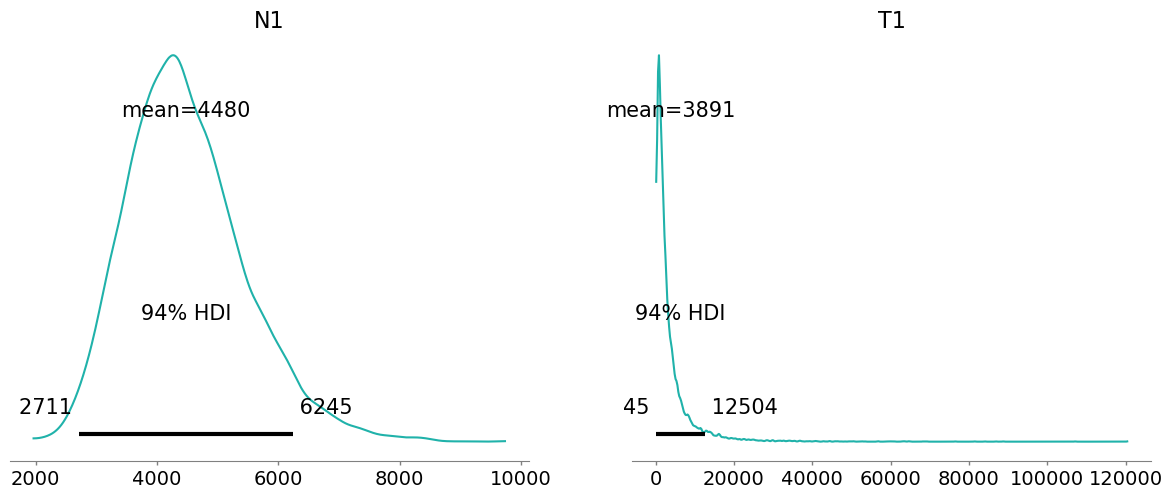

In [23]:
az.plot_posterior(approx.sample(10000), color="LightSeaGreen");


In [9]:
np.random.seed(40)
observed_data = np.random.normal(0.0177,0.25,1000)

with pm.Model() as basic:
    N1 = pm.Gamma('N1',alpha = 25,beta = 0.005)
    T1 = pm.Exponential('T1',lam = 1/3000)
    obs = pm.Normal('obs',mu=frac_function_pm(N1,1,10,0,T1),sigma = 0.25,observed = observed_data)
    mean_field = pm.fit(obj_optimizer=pm.adagrad_window(learning_rate=1e-2))
    trace = mean_field.sample(draws=5000)

Output()

Finished [100%]: Average Loss = 27.784


array([<Axes: title={'center': 'N1'}>, <Axes: title={'center': 'T1'}>],
      dtype=object)

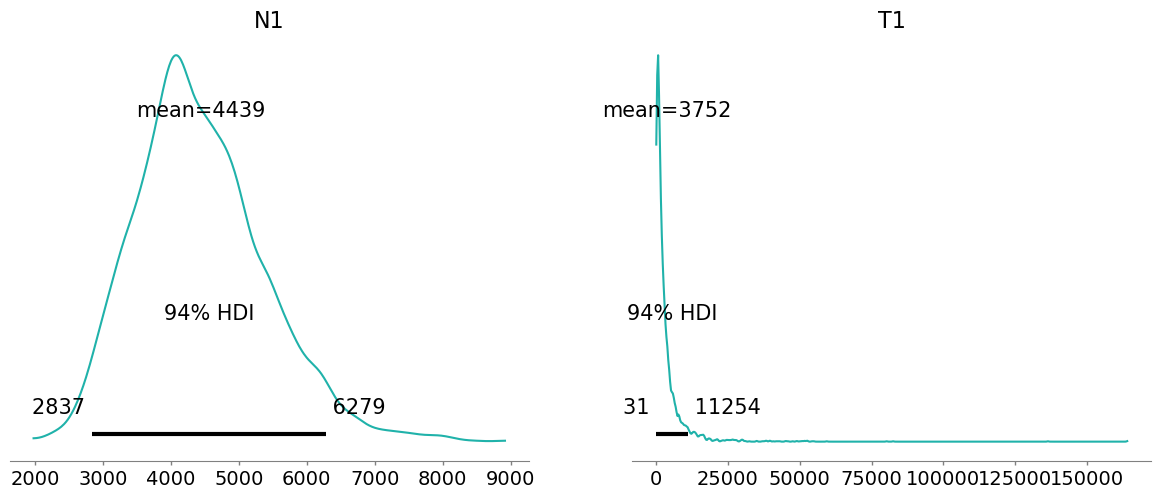

In [21]:
az.plot_posterior(trace, color="LightSeaGreen")


In [7]:
pt.eye(pt.eye(10)[0].shape[0]).eval()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])